<a href="https://colab.research.google.com/github/AnDDoanf/OCR-repos/blob/master/OCR_frameworks_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OCR with pytesseract

In [40]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


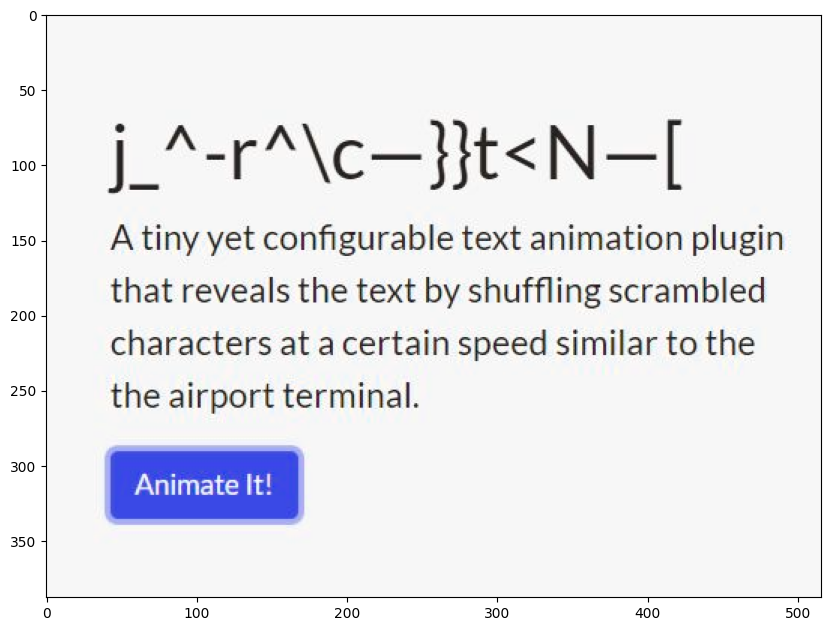

In [50]:
from PIL import Image
import requests
from pytesseract import Output
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,15)


url = "https://www.jqueryscript.net/images/reveal-shuffle-glitch.jpg"
imgcrawl = Image.open(requests.get(url, stream=True).raw)
img = np.array(imgcrawl)[:, :, ::-1].copy()
plt.imshow(img)

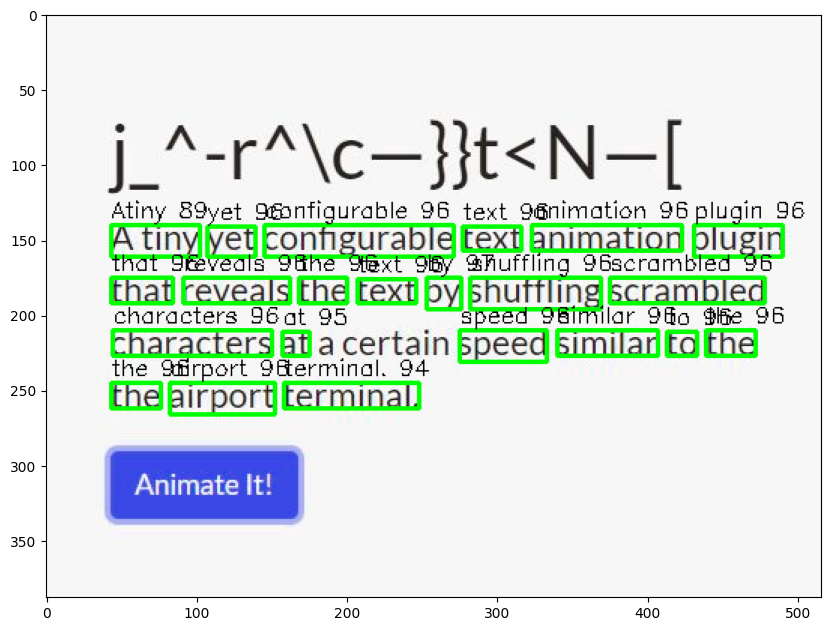

In [51]:
import pytesseract
d = pytesseract.image_to_data(img, output_type=Output.DICT)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 85:
        (x, y, w, h) = d["left"][i], d["top"][i], d["width"][i], d["height"][i]
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) #Plotting bounding box
        img = cv2.putText(img, d['text'][i] +" "+str(d['conf'][i]), (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1) #Plotting texts on top of box

plt.imshow(img)

## OCR with easyocr

In [ ]:
!pip install easyocr

In [90]:
import easyocr

reader = easyocr.Reader(['en','en']) # this needs to run only once to load the model into memory
url = "https://www.jqueryscript.net/images/reveal-shuffle-glitch.jpg"
imgcrawl = Image.open(requests.get(url, stream=True).raw)
img = np.array(imgcrawl)[:, :, ::-1].copy()

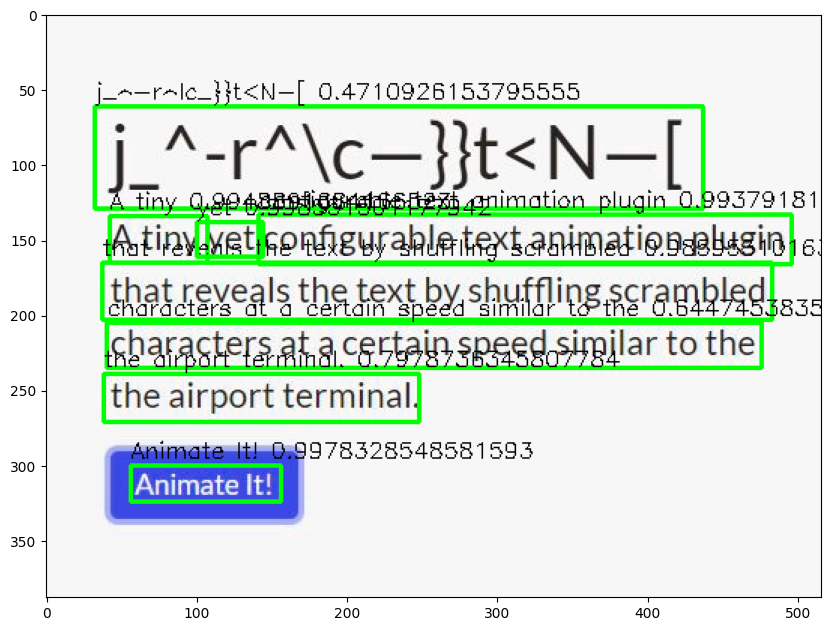

In [91]:
d = reader.readtext(img)
n_boxes = len(d)
for i in d:
    top_left, bot_right = tuple([int(i[0][0][0]), int(i[0][0][1])]), tuple([int(i[0][2][0]), int(i[0][2][1])])
    img = cv2.rectangle(img, top_left, bot_right, (0, 255, 0), 2) #Plotting bounding box
    img = cv2.putText(img, i[1] +" "+str(i[2]), (top_left[0], top_left[1]-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1) #Plotting texts on top of box

plt.imshow(img)

## OCR with docTR

In [ ]:
!pip install python-doctr
!pip install tf2onnx

In [103]:
from doctr.io import DocumentFile
import matplotlib.pyplot as plt
from doctr.models import ocr_predictor
import warnings
warnings.filterwarnings('ignore')

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

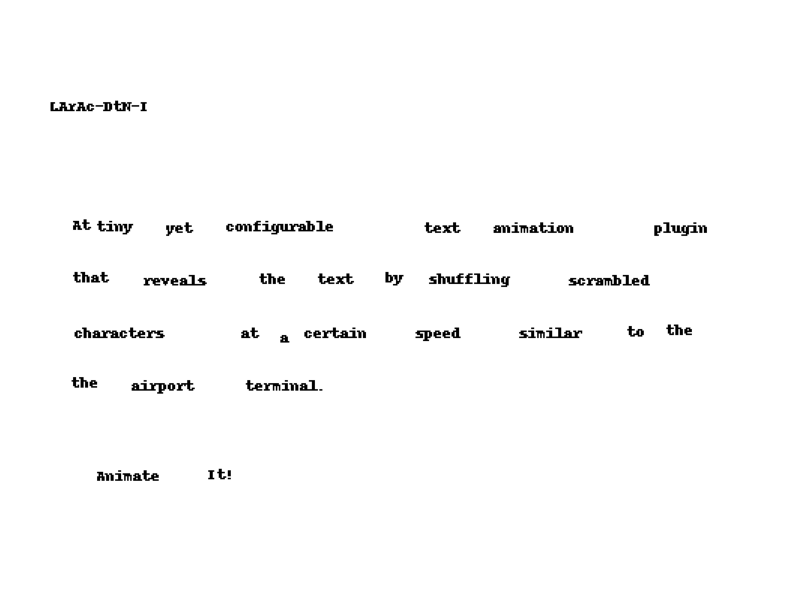

In [104]:
single_img_doc  = DocumentFile.from_images("/content/poo.jpg")
result = model(single_img_doc )

synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]);
plt.axis('off');
plt.show()

In [ ]:
json_output = result.export()
json_output

## Other OCR:
for tables:
- [Multi-column-ocr](https://colab.research.google.com/drive/15fb5SxsUBIyQ_sucBlZ9F7nHMEcOIB1A?usp=sharing#scrollTo=7VdvaG7-1g00)

for short, inline text:
- [VietOCR](https://github.com/pbcquoc/vietocr)
- [swiftOCR](https://github.com/NMAC427/SwiftOCR)

